### 0. Импорт необходимых библиотек

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Получение данных и первичной информации о них

In [132]:
data = pd.read_csv('datasets/games.csv')

data.info()
display(data.head())
display(data['Rating'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В датасете 16715 строк записей. Данные разных типов. Присутствуют пропуски данных, некоторые данные представлены NaN.

### 2. Предобработка данных

#### 2.1 Замена названий столбцов

In [133]:
#  Переименовываем названия столбцов привoдя к нижнему регистру.
# renames = {'Name': 'name', 'Platform': 'platform', ...}; data = data.rename(columns = renames)
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### 2.2 Преобразование типов данных

Преобразуем колонку "год выпуска"  к целому числу, а колонку с оценкой пользователей к вещественному, так как в ней наблюдаются дробные значения.

In [134]:
# Год в целое

display(data['year_of_release'].unique())    # Посмотреть какие года есть
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')

# Оценка пользователей в float
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')    # В случае NaN -  пропускаем и оставляем.

display(data.info())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


None

#### 2.3 Обработка пропусков

In [135]:
# Все пропуски по столбцам:
display(data.isna().sum())

for pos in ('name', 'genre'):
    display(data[pos].unique())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], shape=(11560,), dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

По два пропуска в столбцах 'name' и 'genre', большАя часть в столбцах с оценками и рейтингами.

In [136]:
# Детально посмотрим что за пропуски в названиях и жанрах

for pos in ('name', 'genre'):
    display(data[pos].unique())

    missing_values = data[pos].isnull().sum()
    print(f"Количество пропусков в {pos}: {missing_values}")
    nan_indices = data[data[pos].isnull()].index
    print(f"Индексы пропусков в {pos}: {list(nan_indices)}")
display(data.loc[[659, 14244]])

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], shape=(11560,), dtype=object)

Количество пропусков в name: 2
Индексы пропусков в name: [659, 14244]


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Количество пропусков в genre: 2
Индексы пропусков в genre: [659, 14244]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две игры. Не оценивались и не имеют рейтинга. Продажи низкие. Предваарительное решение - удаляем.

In [137]:
# Удаляем строки по индексам

data = data.drop(nan_indices).reset_index(drop=True)

Посмотрим в каких случаях проявляются значения NaN.

In [138]:
print(data.query('critic_score.isna()').head(10))
# print(data.query('critic_score.isna() and user_score.isna() and rating.isna()').count())

                             name platform  year_of_release         genre  \
1               Super Mario Bros.      NES             1985      Platform   
4        Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                          Tetris       GB             1989        Puzzle   
9                       Duck Hunt      NES             1984       Shooter   
10                     Nintendogs       DS             2005    Simulation   
12    Pokemon Gold/Pokemon Silver       GB             1999  Role-Playing   
18              Super Mario World     SNES             1990      Platform   
20  Pokemon Diamond/Pokemon Pearl       DS             2006  Role-Playing   
21               Super Mario Land       GB             1989      Platform   
22            Super Mario Bros. 3      NES             1988      Platform   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN

NaN появляется во все года, во всех платформах и жанрах, по самым разным продажам. Закономерности не видно, поэтому заменить чем-то конкретным трудно. Оставляем как есть. 

<b>'tbd'</b> -  to be determined - значения должны быть определены. Но пока это строковое значение, по каким-то причинам. Возможно пользователям не предлагалось оценить игру. Так как оценка <b>пока</b> не определена, заменим медианной оценкой по данному жанру игры.

In [139]:
# Заменяем 'tbd' на NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan)

# Преобразуем в числовой формат
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
print(data['user_score'])
display(data['user_score'].isna().sum())


0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16708    NaN
16709    NaN
16710    NaN
16711    NaN
16712    NaN
Name: user_score, Length: 16713, dtype: float64


np.int64(9123)

In [140]:
# Заменяем в нужном столбце значения NaN на медианы для этого жанра
#  
for genre in data['genre'].unique():
    median = data[data['genre'] == genre]['user_score'].median()
    data.loc[(data['user_score'].isna()) & (data['genre'] == genre), 'user_score'] = median

data['user_score'].describe()

count    16713.000000
mean         7.310088
std          1.035561
min          0.000000
25%          7.100000
50%          7.400000
75%          7.800000
max          9.700000
Name: user_score, dtype: float64

В ходе работы обнаружились аномальные года

In [141]:
# data['year_of_release'].sort_values().head(20)
data[data['year_of_release'] == 0]['name'].count()
data = data[data['year_of_release'] != 0]
data.reset_index(drop=True, inplace=True)
data['year_of_release'].sort_values()

1947     1980
542      1980
2613     1980
6202     1980
1744     1980
         ... 
15333    2016
6070     2016
16439    2016
16443    2016
16401    2016
Name: year_of_release, Length: 16444, dtype: int64

#### 2.4 Суммарные продажи по регионам

In [142]:
# ...
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
total_sales = {}

# Суммируем продажи для каждого региона
for region in regions:
    total_sales[region] = data[region].sum()

# Создаем DataFrame из суммы
total_sales_region = pd.DataFrame([total_sales])

display(total_sales_region)

,na_sales,eu_sales,jp_sales,other_sales
0,4341.42,2399.68,1290.64,782.63


### 3. Исследовательский анализ

#### 3.1 Определяем количество проданных игр по годам, строим график.

In [ ]:
# 3.1 Количество игр по годам

def total_sales_by_years(item):
    total = 0
    for region in regions:
        total += item[region]
    return total

data['total_sales'] = data.apply(total_sales_by_years, axis=1)
# data.head()

total_sales_year = data.groupby('year_of_release')['total_sales'].sum()

# total_sales_year.head()

display(type(total_sales_year))

# data['Total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)



pandas.core.series.Series

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64
0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: Total_sales, dtype: float64


In [ ]:
#  График

plt.figure(figsize=(15, 6))
years = total_sales_year.index  # Индекс как годы
values = total_sales_year.values  # Значения продаж

bars = plt.bar(years, values, color='skyblue')
plt.title('Количество продаж по годам', fontsize=16)
plt.xlabel('Года', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.xticks(years, rotation=45)  
plt.show()


В ходе построения проявились года 0. Вернулся и удалил их на более раннем этапе, поэтому здесь они не представлены. Заметный рост (изменение) в продажах наблюдаются после 1995 года, но с 1980 года продажи есть, хотя их значения менялись слабо (циклически). Буду учитывать данные за все представленные года. 

#### 3.2 Данные по платформам

Построю сводную таблицу по платформам

In [ ]:
# 
platforms = data['platform']
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
years = data['year_of_release']

platform_sales = data.pivot_table(index='year_of_release', columns='platform', values=regions, aggfunc='sum', fill_value=0)
print(platform_sales.to_string())


In [ ]:
# Получим платформы с наибольшими продажами по годам
top_platforms_per_year = platform_sales.idxmax(axis=1)

# Также можно получить максимальные значения продаж
max_sales_per_year = platform_sales.max(axis=1)

# Объединим результаты в один DataFrame
top_platforms_sales = pd.DataFrame({
    'Top Platform': top_platforms_per_year,
    'Max Sales': max_sales_per_year
})

print(top_platforms_sales)

In [ ]:
# Группируем по году и платформе, вычисляем суммарные продажи
grouped = data.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Находим платформу с максимальными продажами для каждого года
max_sales_per_year = grouped.loc[grouped.groupby('year_of_release')['total_sales'].idxmax()]

# Построение столбчатой диаграммы
plt.figure(figsize=(15, 6))
plt.bar(max_sales_per_year['year_of_release'], max_sales_per_year['total_sales'], 
        color='skyblue', edgecolor='black')

# Добавление подписей
plt.title('Платформы с максимальными продажами по годам', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Максимальные продажи', fontsize=14)
plt.xticks(max_sales_per_year['year_of_release'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, row in max_sales_per_year.iterrows():
    plt.text(row['year_of_release'], row['total_sales'], row['platform'], 
             ha='center', va='bottom', fontsize=12)
    
plt.show()

Выводы:

Платформы появляются и исчезают в среднем каждые 4 - 5 лет.
Новая платформа появляется после начала уменьшения продаж предыдущей.

#### 3.3, 3.4 Актуальный период, выделение данных за актуальный период
В качестве актуального периода беру 2013-2016 год: появилась платформа PS4, начался спад ее продаж - должна появиться новая.

In [ ]:
# Отсекаю в новый dataFrame актуальные года
display(data.sort_values('year_of_release'))  # чтобы посмотреть как вышло..
data_actual_years = data[data['year_of_release'] > 2012]
display(data_actual_years.sort_values('year_of_release'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,Total_sales
1947,Defender,2600,1980,Misc,0.99,0.05,0.00,0.01,NaN,7.1,NaN,1.05,1.05
542,Missile Command,2600,1980,Shooter,2.56,0.17,0.00,0.03,NaN,7.4,NaN,2.76,2.76
2613,Boxing,2600,1980,Fighting,0.72,0.04,0.00,0.01,NaN,7.6,NaN,0.77,0.77
6202,Bridge,2600,1980,Misc,0.25,0.02,0.00,0.00,NaN,7.1,NaN,0.27,0.27
1744,Kaboom!,2600,1980,Misc,1.07,0.07,0.00,0.01,NaN,7.1,NaN,1.15,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15333,Mighty No. 9,XOne,2016,Platform,0.02,0.00,0.00,0.00,55.0,4.2,E10+,0.02,0.02
6070,Monster Hunter Stories,3DS,2016,Action,0.00,0.00,0.28,0.00,NaN,7.4,NaN,0.28,0.28
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,7.4,NaN,0.01,0.01
16443,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,7.5,NaN,0.01,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,Total_sales
14114,Super Robot Taisen OG Saga: Masou Kishin III -...,PSV,2013,Strategy,0.00,0.00,0.03,0.00,NaN,7.8,NaN,0.03,0.03
14126,Turbo: Super Stunt Squad,DS,2013,Sports,0.00,0.03,0.00,0.00,NaN,7.4,E,0.03,0.03
14146,Toriko: Ultimate Survival,3DS,2013,Action,0.00,0.00,0.03,0.00,NaN,7.4,NaN,0.03,0.03
14178,Exstetra,PSV,2013,Role-Playing,0.00,0.00,0.03,0.00,NaN,7.8,NaN,0.03,0.03
322,Call of Duty: Ghosts,PS4,2013,Shooter,1.78,1.43,0.05,0.57,78.0,3.7,M,3.83,3.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16372,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01,0.01
16359,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01,0.01
16352,Norn + Nonette: Act Tune,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,7.4,NaN,0.01,0.01
16346,Codename: Panzers Complete Collection,PC,2016,Strategy,0.00,0.01,0.00,0.00,NaN,7.8,NaN,0.01,0.01


In [ ]:
# max_sales_per_year_actual = max_sales_per_year[max_sales_per_year['year_of_release'] > 2012]
# display(max_sales_per_year_actual)
grouped_actual = data.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
grouped_actual = grouped_actual[grouped_actual['year_of_release'] > 2012]
grouped_actual

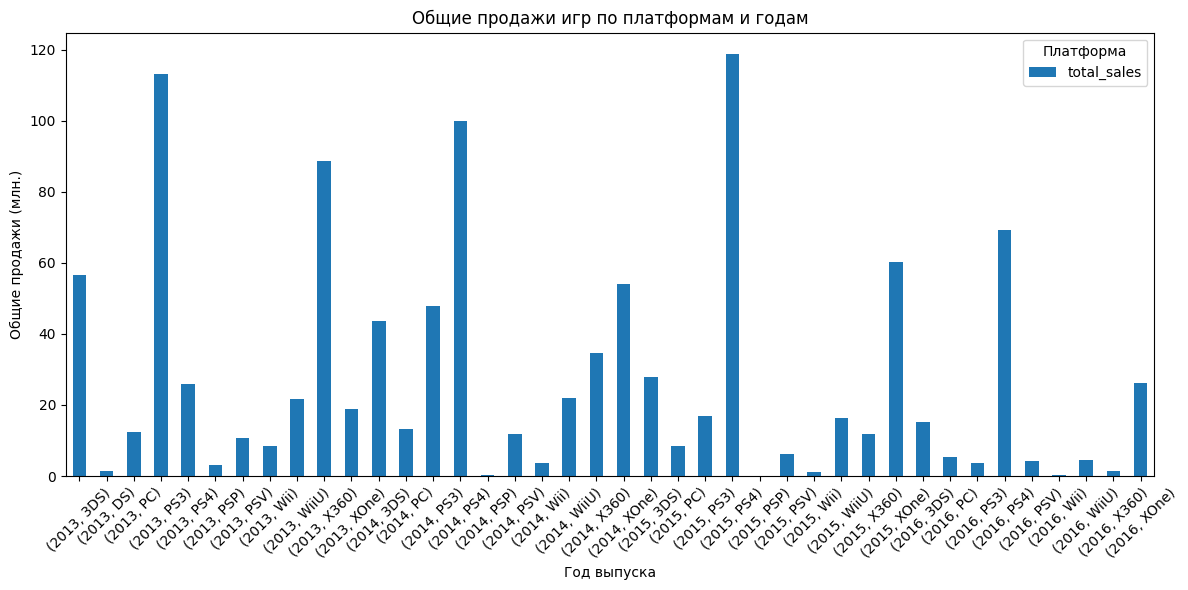

In [184]:
# Построим столбчатую диаграмму
plt.figure(figsize=(12, 6))
grouped_actual.groupby(['year_of_release', 'platform'])['total_sales'].sum().plot(kind='bar', stacked=True)
plt.title('Общие продажи игр по платформам и годам')
plt.xlabel('Год выпуска')
plt.ylabel('Общие продажи (млн.)')
plt.legend(title='Платформа')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Выводы по графику (2013 - 2016):

Значительно выделяются платформы:

- РС (непрерывно падают продажи)
- WiiU (непрерывно падают )
- Х360 (удерживают значительную долю)
- PS3 (значительный рост и лидерство до 2016 года) - останется в лидерах

лидеры, которые скорее всего останутся таковыми - PS3, X360.

#### 3.5  Ящик с усами


<Figure size 1200x600 with 0 Axes>

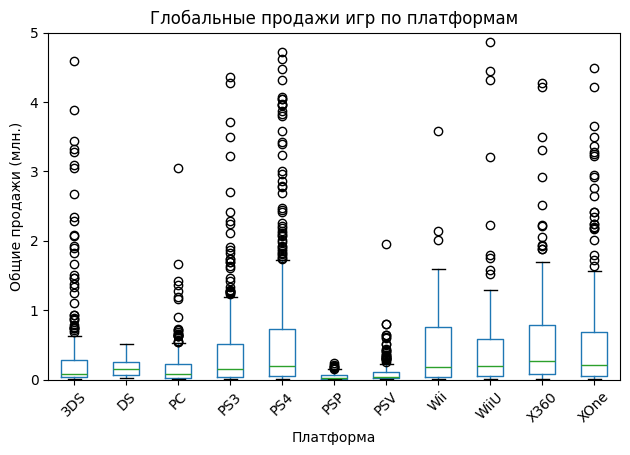

In [187]:
# Ящик с усами
# Строим график "ящик с усами"
plt.figure(figsize=(12, 6))
data_actual_years.boxplot(column='total_sales', by='platform', grid=False)
plt.ylim(0, 5)
plt.title('Глобальные продажи игр по платформам')
plt.suptitle('')  # Убираем стандартный заголовок
plt.xlabel('Платформа')
plt.ylabel('Общие продажи (млн.)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.6 Влияние отзывов на продажи
Для примера возьмём PS3

In [ ]:
# ...

data_ps3 = data_actual_years[data_actual_years['platform'] == 'PS3']
# data_ps3.describe()

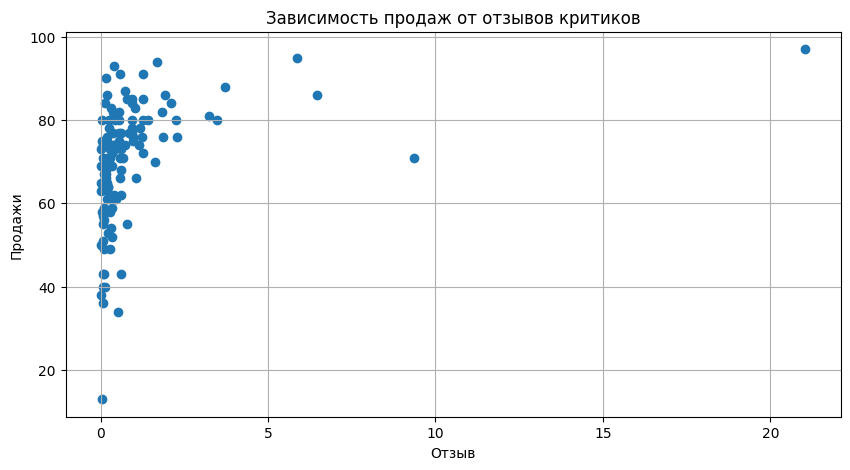

0.3342853393371919


In [197]:
# Строим график зависимости sales от year
plt.figure(figsize=(10, 5))
plt.scatter(x=data_ps3['total_sales'], y=data_ps3['critic_score'], marker='o')
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Отзыв')
plt.ylabel('Продажи')
plt.grid()
plt.show()
print(data_ps3['critic_score'].corr(data_ps3['total_sales']))


Корреляция слабая. Отзывы критиков слабо влияют на продажи, но всё-таки более высокие отзывы увеличивают продажи.

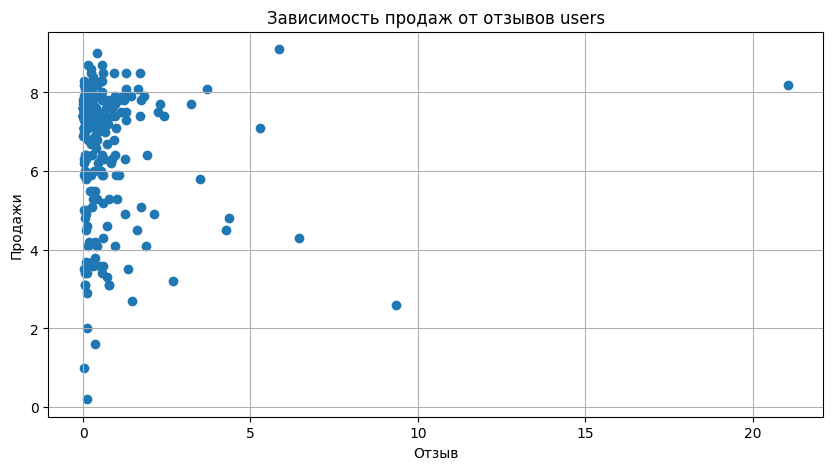

-0.08598425479117172


In [199]:
# Строим график зависимости sales от user_score
plt.figure(figsize=(10, 5))
plt.scatter(x=data_ps3['total_sales'], y=data_ps3['user_score'], marker='o')
plt.title('Зависимость продаж от отзывов users')
plt.xlabel('Отзыв')
plt.ylabel('Продажи')
plt.grid()
plt.show()
print(data_ps3['user_score'].corr(data_ps3['total_sales']))

Крреляция слабо отрицательная. Чем выше отзывы тем меньше продажи. Но влияние слабое.
Проверим на платформах  X360, PC


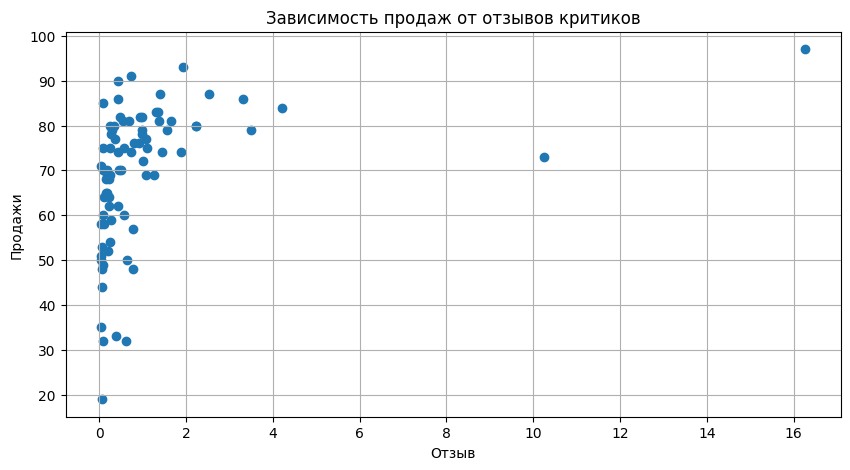

0.3503445460228664


In [201]:
# X360

data_x360 = data_actual_years[data_actual_years['platform'] == 'X360']
# Строим график зависимости sales от year
plt.figure(figsize=(10, 5))
plt.scatter(x=data_ps3['total_sales'], y=data_ps3['critic_score'], marker='o')
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Отзыв')
plt.ylabel('Продажи')
plt.grid()
plt.show()
print(data_x360['critic_score'].corr(data_x360['total_sales']))

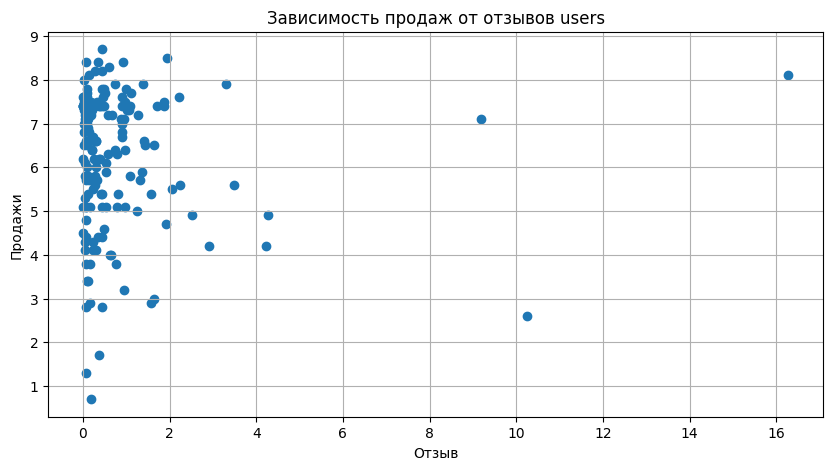

-0.04974201943138053


In [204]:
# X360

data_x360 = data_actual_years[data_actual_years['platform'] == 'X360']
# Строим график зависимости sales от year
plt.figure(figsize=(10, 5))
plt.scatter(x=data_ps3['total_sales'], y=data_ps3['user_score'], marker='o')
plt.title('Зависимость продаж от отзывов users')
plt.xlabel('Отзыв')
plt.ylabel('Продажи')
plt.grid()
plt.show()
print(data_x360['user_score'].corr(data_x360['total_sales']))

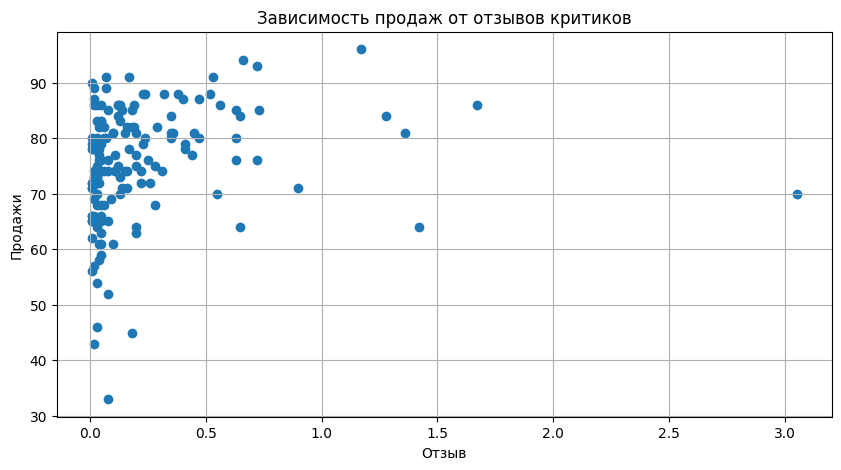

0.1960302829436937


In [ ]:
# PC

data_pc = data_actual_years[data_actual_years['platform'] == 'PC']
# Строим график зависимости sales от year
plt.figure(figsize=(10, 5))
plt.scatter(x=data_pc['total_sales'], y=data_pc['critic_score'], marker='o')
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Отзыв')
plt.ylabel('Продажи')
plt.grid()
plt.show()
print(data_pc['critic_score'].corr(data_pc['total_sales']))

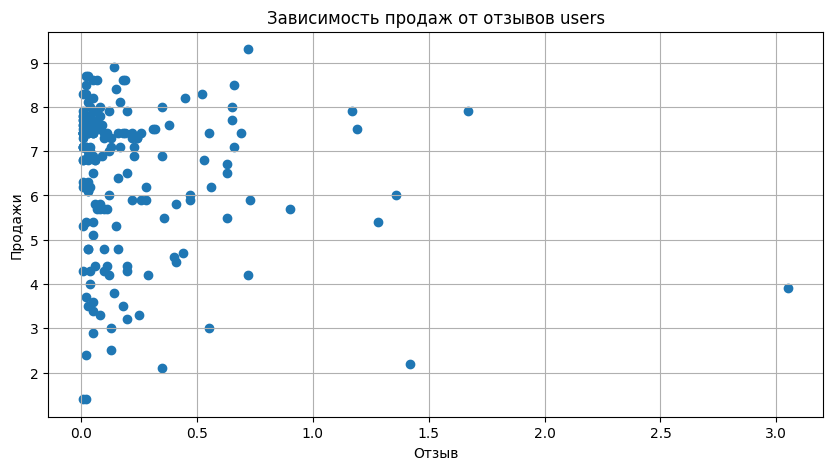

-0.11686166164546588


In [206]:
# PC

data_pc = data_actual_years[data_actual_years['platform'] == 'PC']
# Строим график зависимости sales от year
plt.figure(figsize=(10, 5))
plt.scatter(x=data_pc['total_sales'], y=data_pc['user_score'], marker='o')
plt.title('Зависимость продаж от отзывов users')
plt.xlabel('Отзыв')
plt.ylabel('Продажи')
plt.grid()
plt.show()
print(data_pc['user_score'].corr(data_pc['total_sales']))

На двух других популярных платформах картина та же: отзывы критиков - слабая положительная корреляция, с отзывами пользователей - очеь слабая отрицательная